<a href="https://colab.research.google.com/github/NsikakMenim/Machine-Learning-Portfolio./blob/main/keras_regression_kc_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv

--2025-01-14 10:28:17--  https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv.1’

kc_house_data.csv.1 100%[===================>]   2.40M  --.-KB/s    in 0.08s   

2025-01-14 10:28:18 (31.7 MB/s) - ‘kc_house_data.csv.1’ saved [2515206/2515206]



In [ ]:
df = pd.read_csv('kc_house_data.csv')

# 1. Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Axes: xlabel='price', ylabel='Count'>

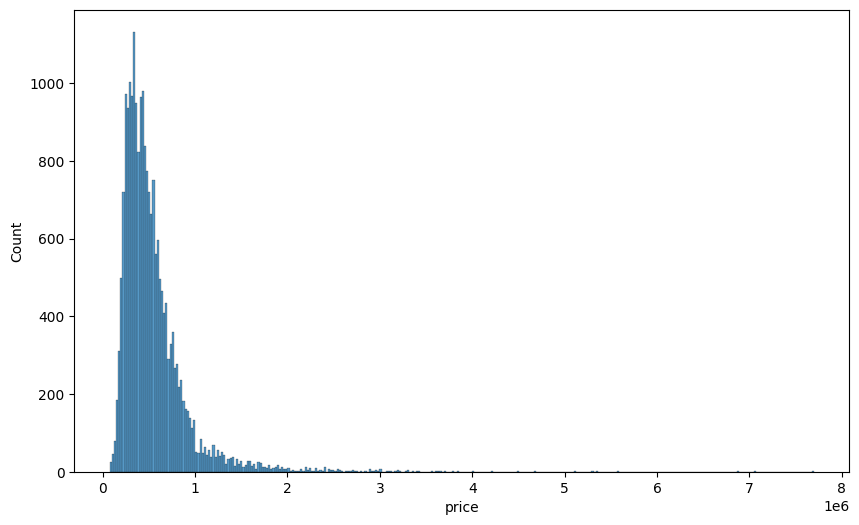

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['price'])

In [ ]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Calculate correlations, excluding the original 'date' column
df.drop(columns=['date']).corr()['price'].sort_values()

,price
zipcode,-0.053203
id,-0.016762
year,0.003576
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794


<Axes: xlabel='sqft_living', ylabel='price'>

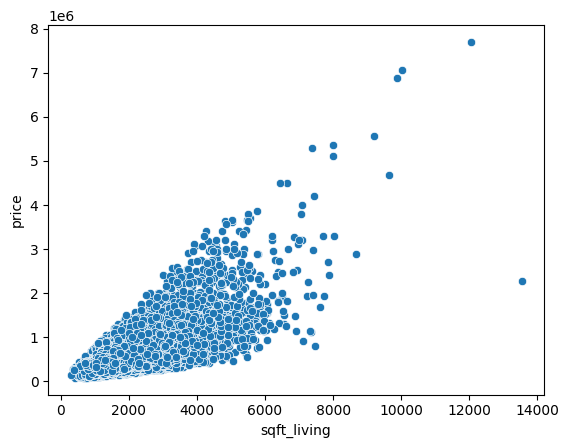

In [ ]:
sns.scatterplot(x='sqft_living',y='price',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

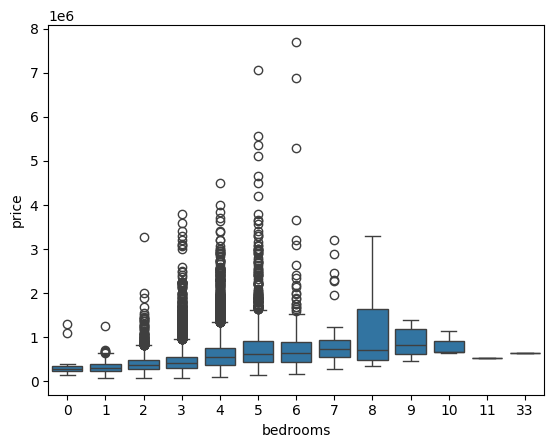

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

<Axes: xlabel='price', ylabel='lat'>

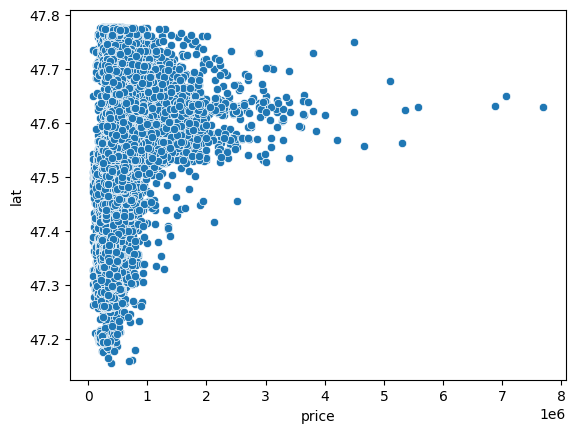

In [ ]:
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

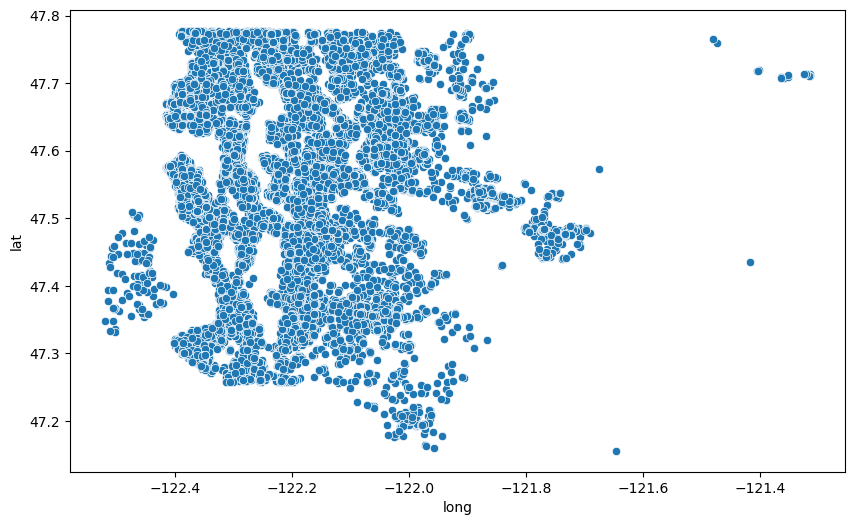

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=df)

In [ ]:
df.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,...,860,0,1954,0,98146,47.4987,-122.341,1140,11250,2014
16198,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,...,730,0,1943,0,98168,47.4808,-122.315,860,9000,2015
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,430,0,1912,0,98014,47.6499,-121.909,1200,7500,2014
15293,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,...,780,0,1942,0,98168,47.4739,-122.280,1700,10387,2014


In [ ]:
len(df)

21613

In [ ]:
top_99_percent = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

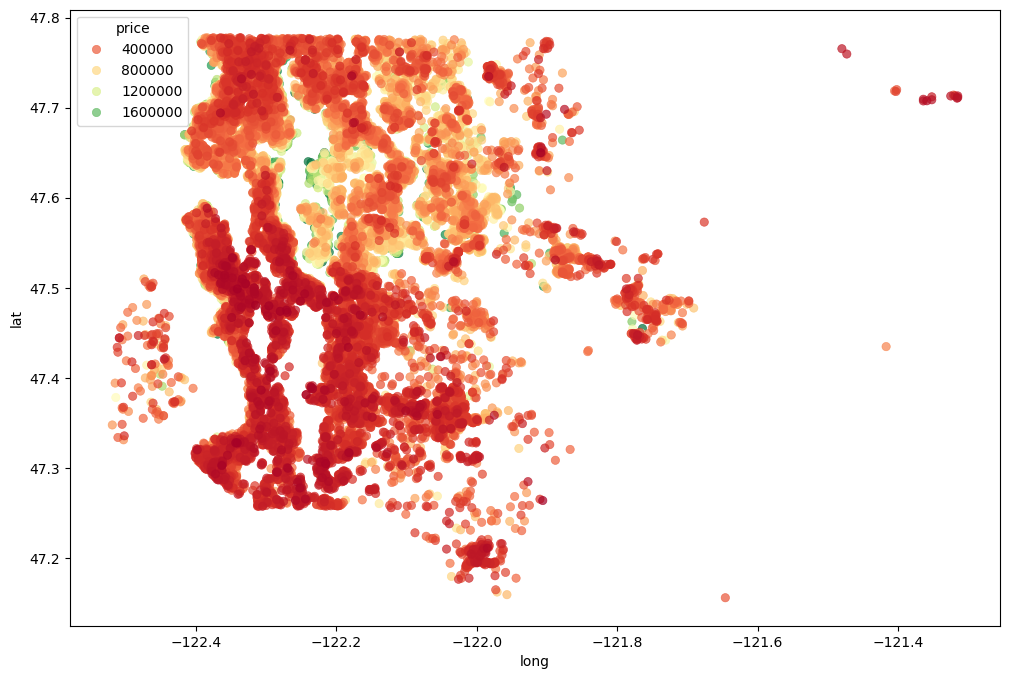

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=top_99_percent, hue='price', palette='RdYlGn', edgecolor=None, alpha=0.7)

<Axes: xlabel='waterfront', ylabel='price'>

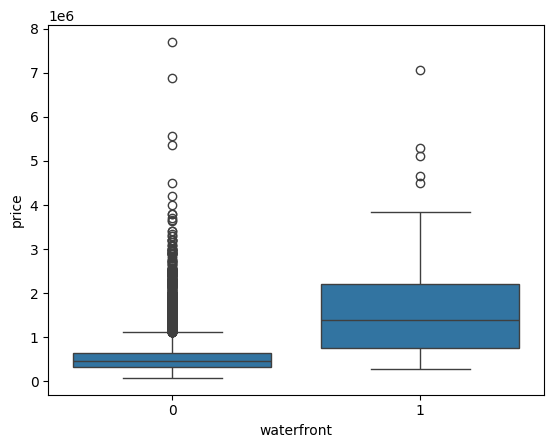

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['date']

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
...,...
21608,2014-05-21
21609,2015-02-23
21610,2014-06-23
21611,2015-01-16


In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [ ]:
# def year_extraction(date):
#  year = date.year
#  return year

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

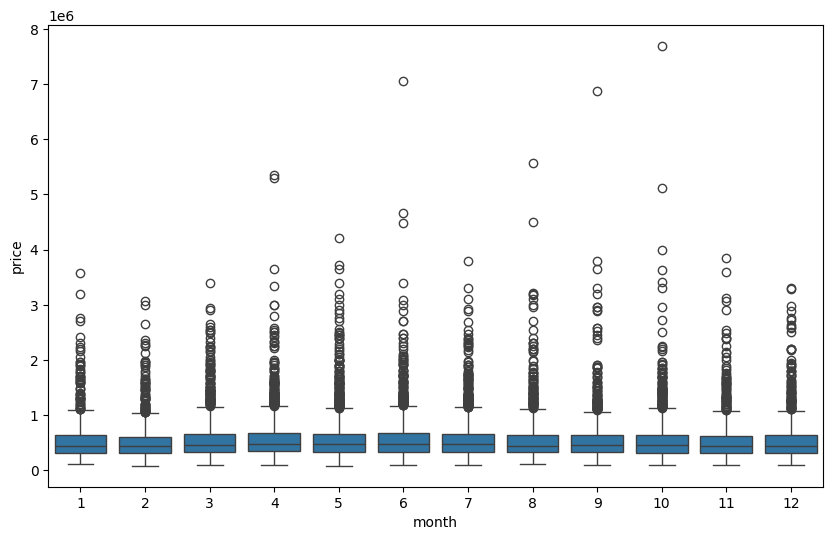

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

<Axes: xlabel='month'>

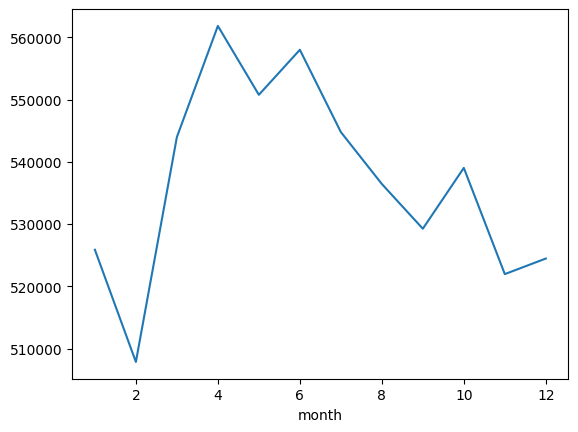

In [ ]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

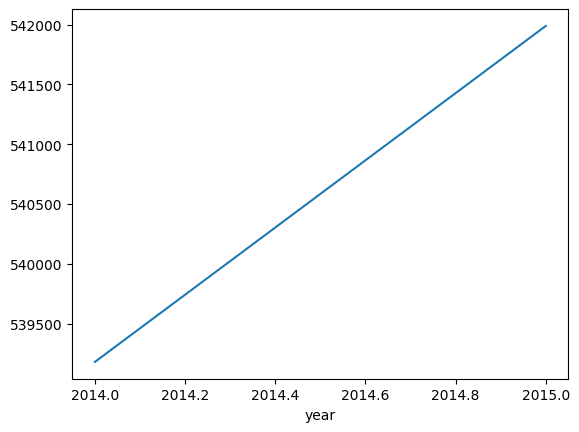

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date', axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
# df['zipcode'].value_counts()

In [ ]:
df =df.drop('zipcode', axis=1)

In [ ]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,20699
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1


In [ ]:
df['sqft_basement'].value_counts()

,count
sqft_basement,
0,13126
600,221
700,218
500,214
800,206
...,...
518,1
374,1
784,1


# 2. Data Preprocessing

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Create the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(15129, 19)

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 415551029248.0000 - val_loss: 432976199680.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 415958204416.0000 - val_loss: 427203035136.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 419318300672.0000 - val_loss: 373223292928.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 340882685952.0000 - val_loss: 206720417792.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 162810642432.0000 - val_loss: 92120440832.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88240840704.0000 - val_loss: 73642074112.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77934764032.0000 - val_loss: 65675853824.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68273741824.0000 - val_loss: 60958998528.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63185063936.0000 - val_loss: 57458290688.0000
Epoch 10/400
119/119 ━━━━━━━

<Axes: >

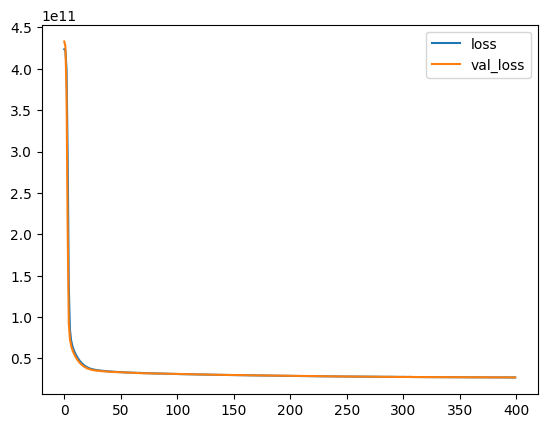

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# 4. Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mean_squared_error(y_test, predictions)

26952142828.03632

In [ ]:
mean_absolute_error(y_test, predictions)

101658.55247532387

In [ ]:
df['price'].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [ ]:
explained_variance_score(y_test, predictions)

0.8080166013492834

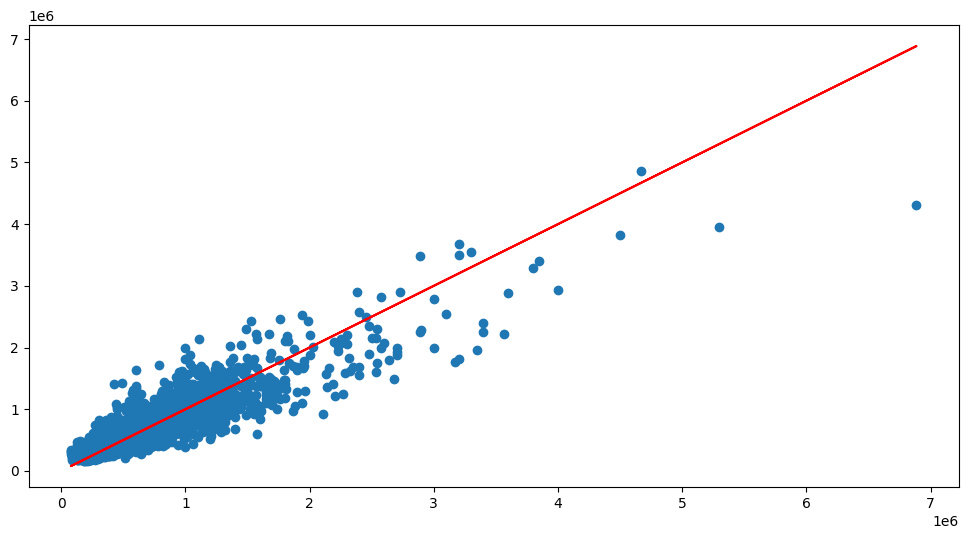

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [ ]:
single_house = df.drop('price', axis=1).iloc[0]

In [ ]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[272577.56]], dtype=float32)

In [ ]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
